<a href="https://colab.research.google.com/github/leticiaram/Taller_Calculo/blob/main/NR_Newton_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada


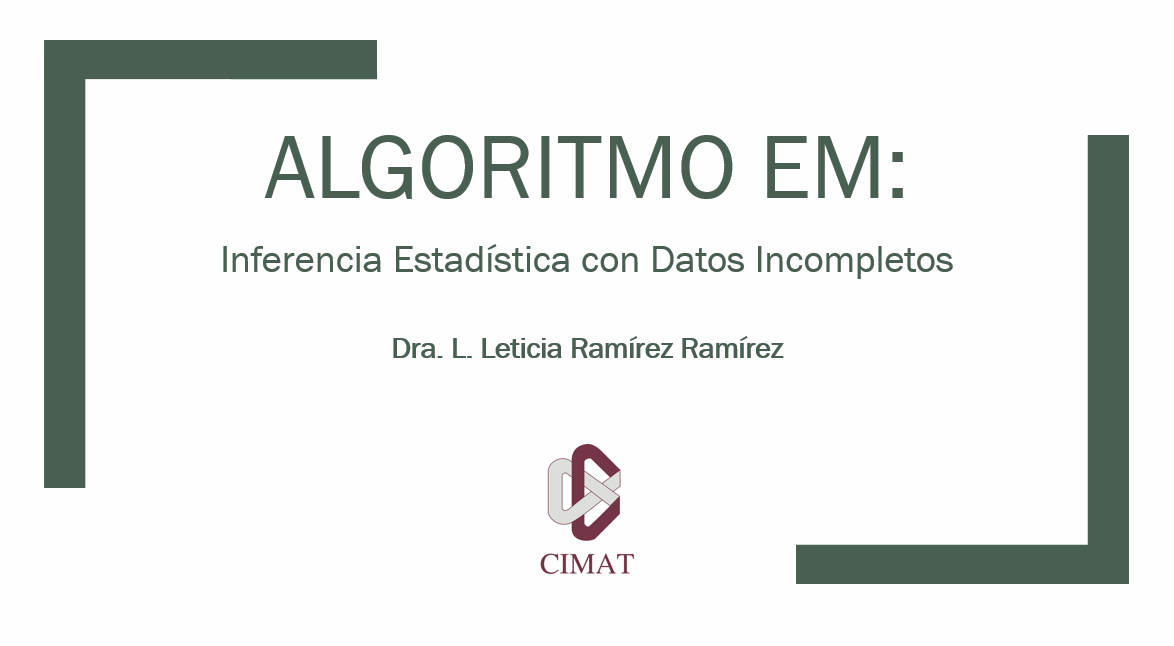

# Serie de Taylor

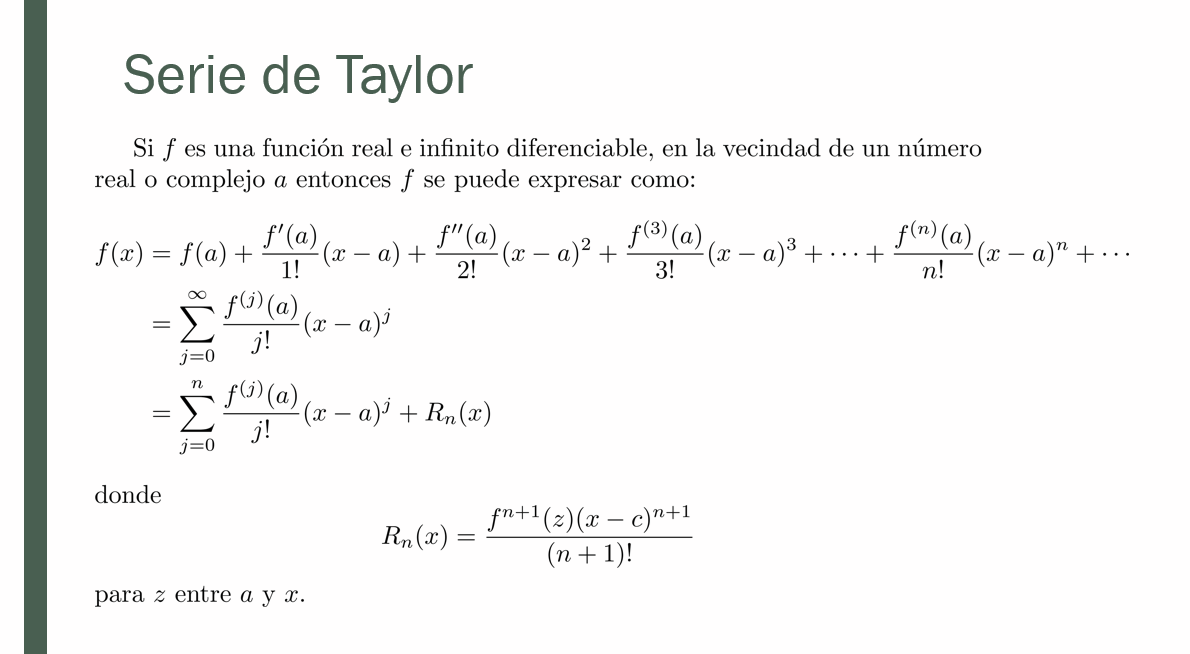

Consideramos la función
$$
y=sen(x)
$$

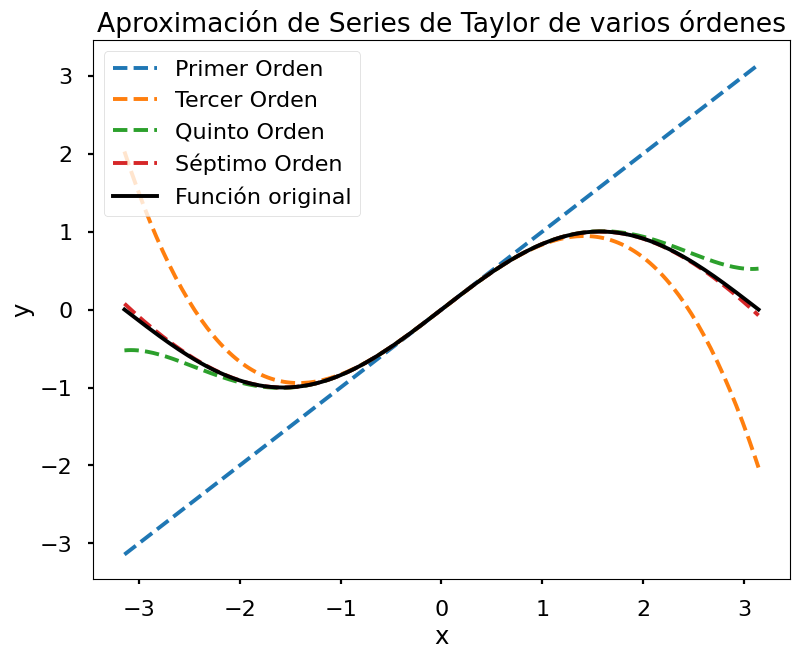

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
#plt.style.use('seaborn-poster')

x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['Primer Orden', 'Tercer Orden', 'Quinto Orden', 'Séptimo Orden']

plt.figure(figsize = (9,7))
for n, label in zip(range(4), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / math.factorial(2*n+1)
    plt.plot(x,y,'--', label = label)

plt.plot(x, np.sin(x), 'k', label = 'Función original')
plt.legend(loc = 'upper left')
#plt.grid()
plt.title('Aproximación de Series de Taylor de varios órdenes')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Métodos para datos completos

## Newton-Raphson: Cálculo de raices (Taylor de 1er orden)

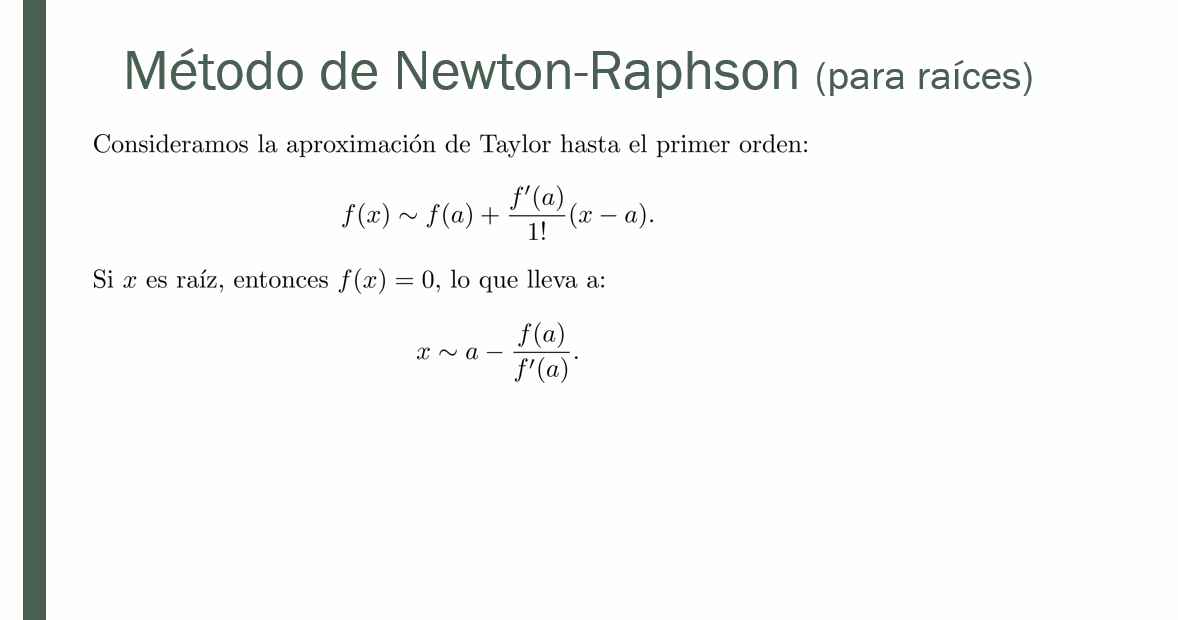

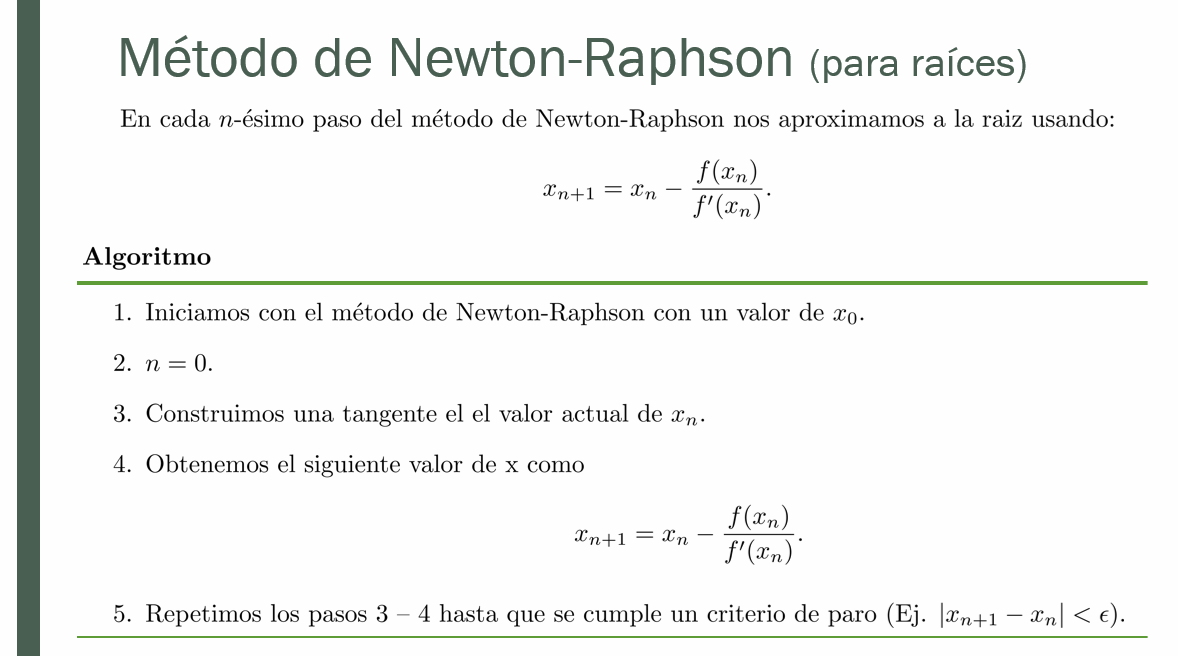

### Ejemplo

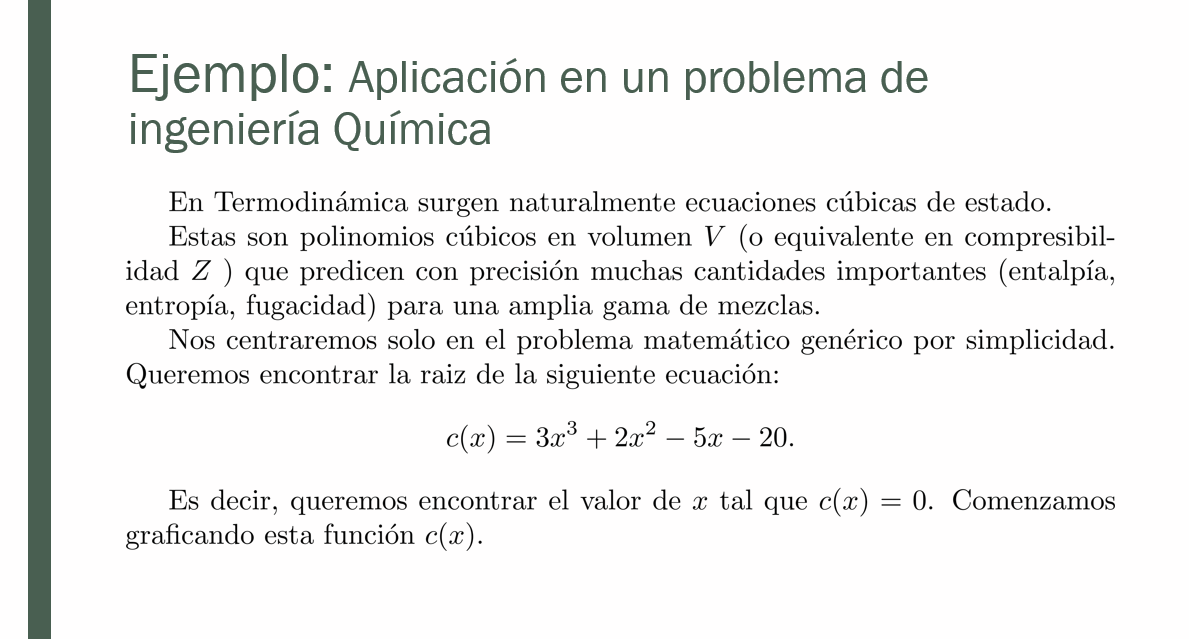

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#this next line is only needed in iPython notebooks
%matplotlib inline

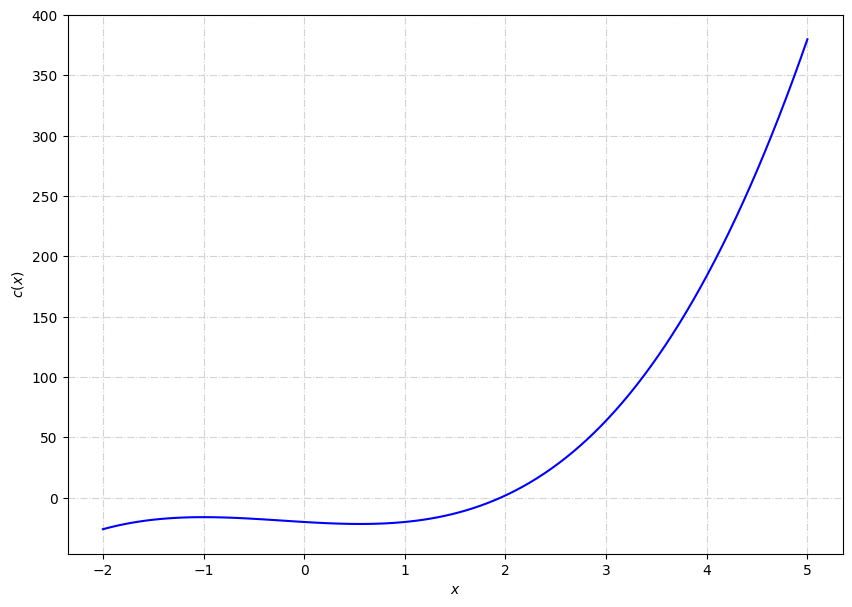

In [ ]:
def nonlinear_function(x):
    return 3*x**3 + 2*x**2 - 5*x - 20


X = np.linspace(-2,5,100)
plt.figure(figsize = (10,7))
plt.plot(X, nonlinear_function(X), label="c(x)",color="blue")
plt.grid(which='major',color='lightgray', linestyle='-.')
plt.xlabel("$x$")
plt.ylabel("$c(x)$")
plt.show()

#### **Iteración 1**

Iniciamos con el método de Newton-Raphson con un valor de $x_0 = 1.25$.

x0 = 1.25 (inicial)
x1 = 2.477777777777778


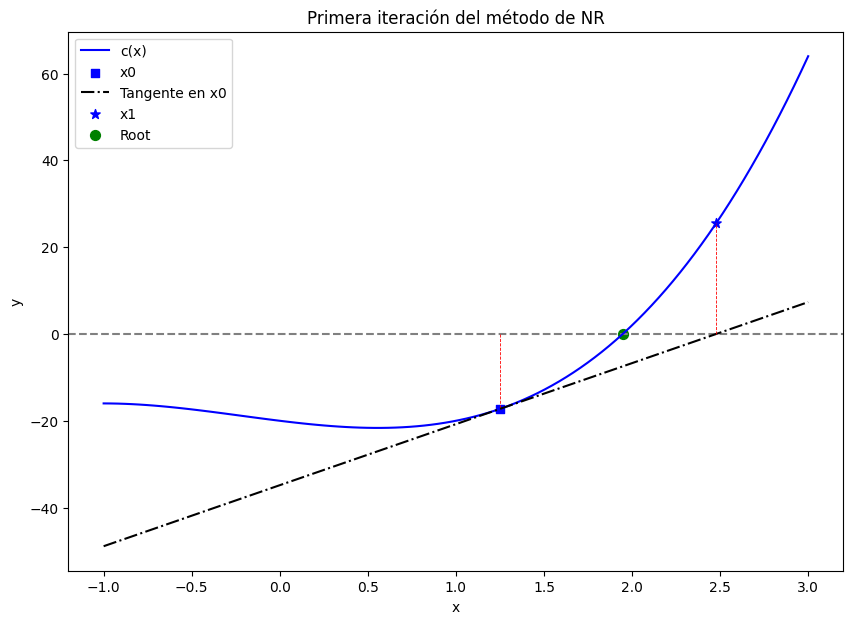

In [ ]:
x0 = 1.25
X = np.linspace(-1,3,100)

def graf1pasoNR(x0, X, titulo):
  print("x0 =",x0, "(inicial)")
  plt.figure(figsize = (10,7))
  plt.axhline(y=0, color='gray', linestyle='--')

  plt.plot(X,nonlinear_function(X),label="c(x)",color="blue")  # graficamos la función

  plt.plot(np.array([x0, x0]),
           np.array([0,nonlinear_function(x0)]),'r--', linewidth=0.6)  # linea vertical
  plt.scatter(x0,nonlinear_function(x0),label="x0",
            marker="s", s=30,color="blue")                   # valor inicial (cuadro)
  # Recta tangente
  def pendiente_nonlinear_function(x):                         # pendiente
      return 9*x**2 + 4*x - 5
  plt.plot(X,nonlinear_function(x0) + pendiente_nonlinear_function(x0)*(X-x0),
           'k-.', label="Tangente en x0")                      # recta tangente de f(x0)
  # Cálculo del siguiente valor (actualizamos x) y graficamos
  x1 = x0 - nonlinear_function(x0) / pendiente_nonlinear_function(x0)

  plt.plot(np.array([x1, x1]),
           np.array([0,nonlinear_function(x1)]),'r--',linewidth=0.6)    # linea vertical
  plt.scatter(x1, nonlinear_function(x1),label="x1",
            marker="*", s=50,color="blue")                   # siguiente valor (estrella)
  print("x1 =", x1)

  # root for c(x)=0
  plt.scatter(1.94731,0,label="Root", s=50, color="green")

  plt.legend(loc="best")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(titulo)
  plt.show()
  return(x1)

x1 = graf1pasoNR(x0,X,"Primera iteración del método de NR")

#### **Iteración 2**

In [ ]:
x0 = x1
X = np.linspace(1,3,100)

x0 = 2.477777777777778 (inicial)
x1 = 2.053515847561906


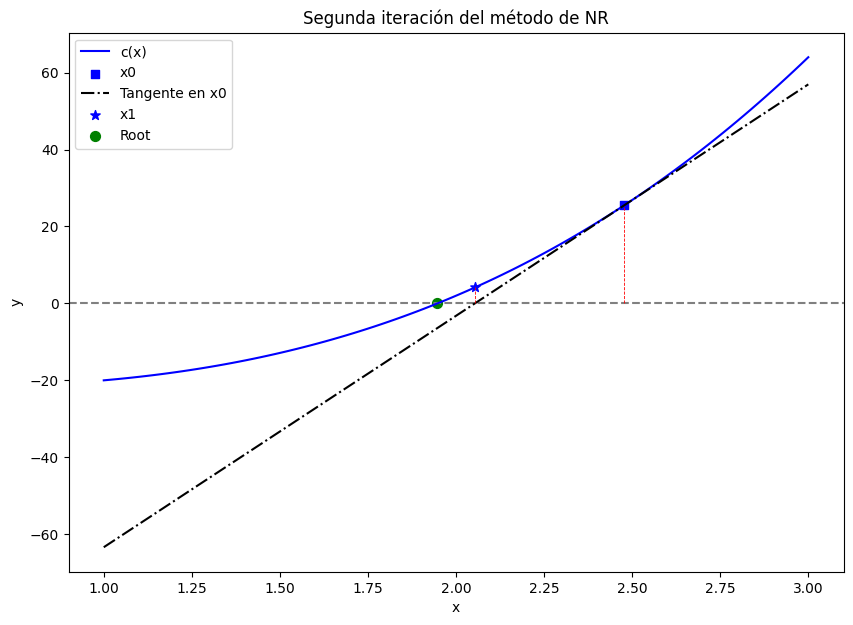

In [ ]:
x1 = graf1pasoNR(x0,X,"Segunda iteración del método de NR")

#### **Iteración 3**


In [ ]:
x0 = x1
X = np.linspace(1.9,2.1,100)

x0 = 2.053515847561906 (inicial)
x1 = 1.9528304384623691


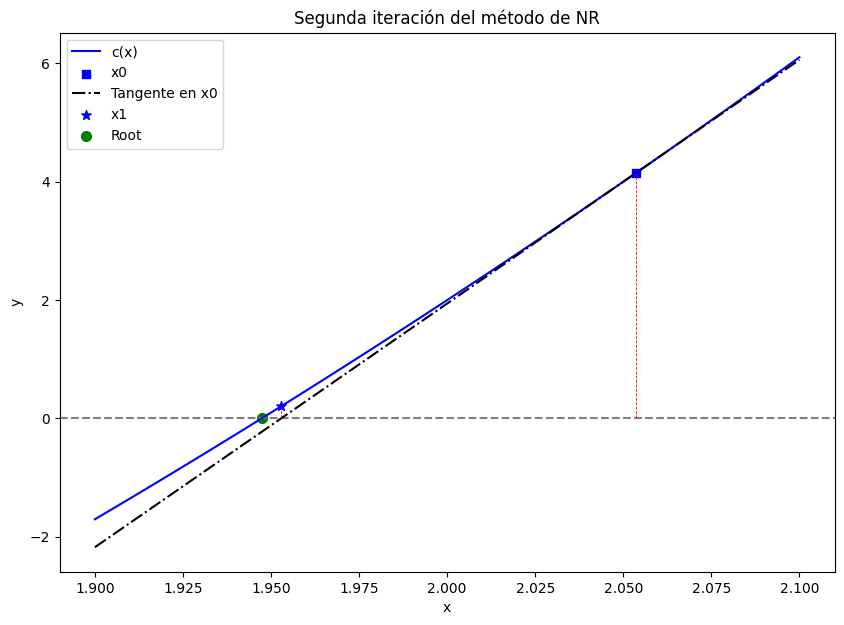

In [ ]:
x1 = graf1pasoNR(x0,X,"Segunda iteración del método de NR")

#### Iteración 4

In [ ]:
x0 = x1
X = np.linspace(1.93,1.96,50)

x0 = 1.9528304384623691 (inicial)
x1 = 1.9473213154733453


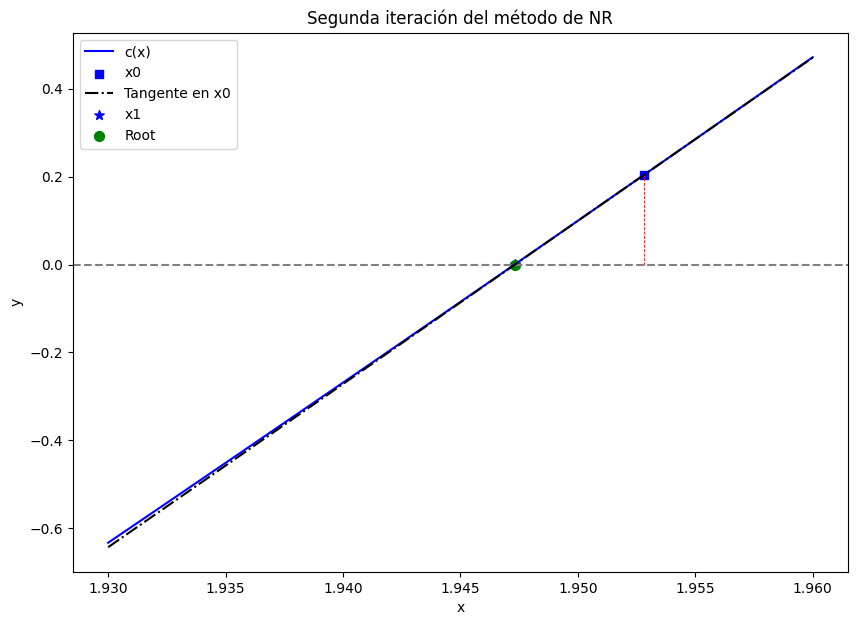

In [ ]:
x1 = graf1pasoNR(x0,X,"Segunda iteración del método de NR")

## Minimización por descenso de gradiente

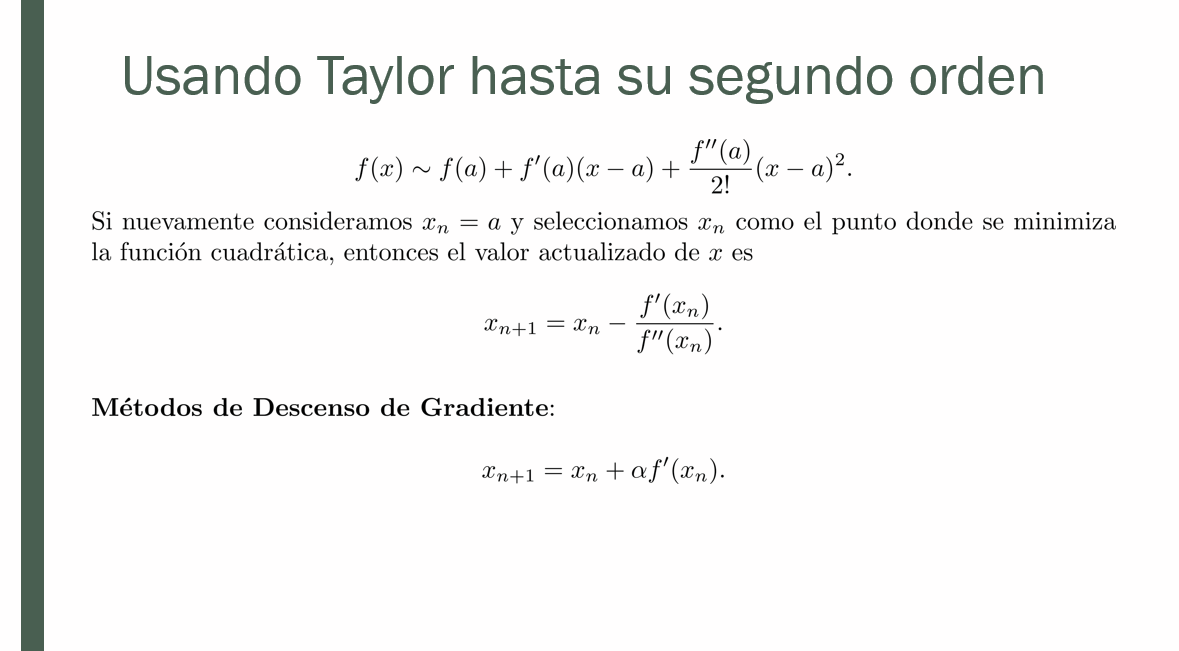

### Ejemplo: Usando Aproximación de Taylor de 2do orden


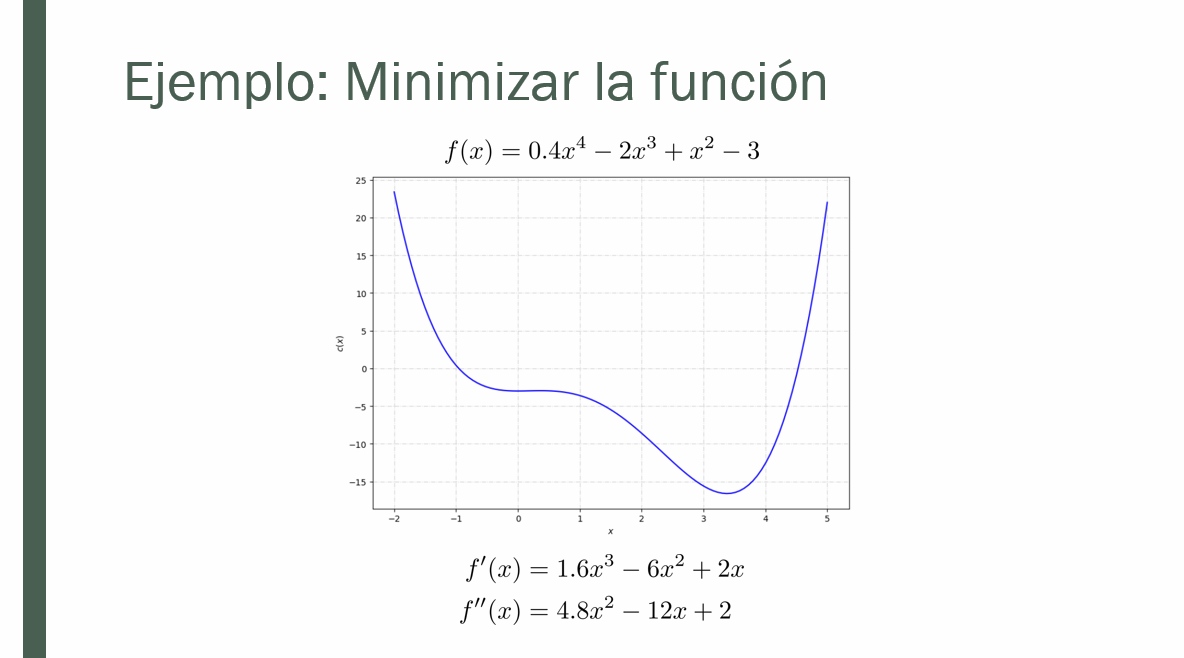

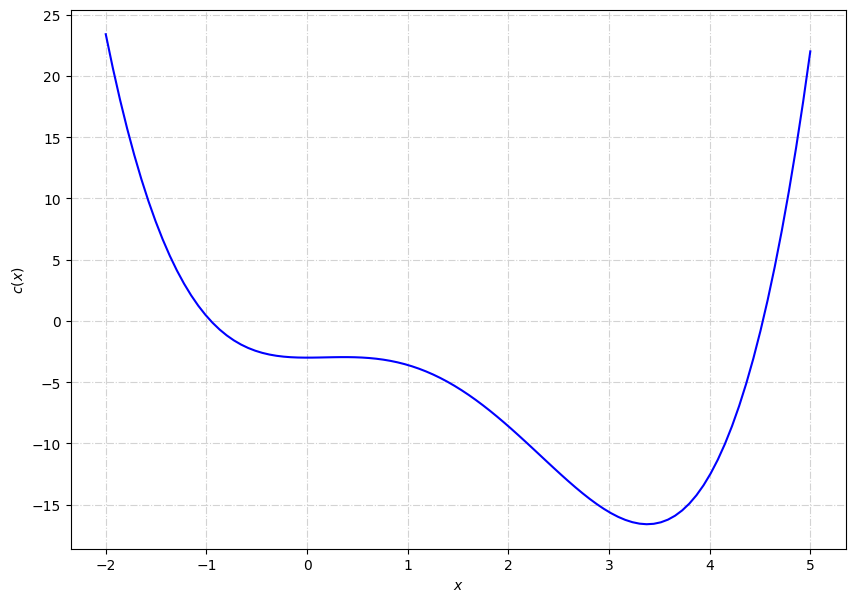

In [ ]:
def funcion_p(x):
    return 0.4*x**4 -2*x**3+x**2-3


X = np.linspace(-2,5,100)
plt.figure(figsize = (10,7))
plt.plot(X, funcion_p(X), label="c(x)",color="blue")
plt.grid(which='major',color='lightgray', linestyle='-.')
plt.xlabel("$x$")
plt.ylabel("$c(x)$")
plt.show()

#### x0 = -1.0

In [ ]:
def pendiente_deriv_funcion_p(x):                    # Primera derivada
  return 1.6*x**3 - 6*x**2 + 2*x

def seg_deriv_funcion_p(x):                          # Segunda derivada
  return 4.8*x**2 -12*x + 2

def xnp1(x_n):
  return x_n - pendiente_deriv_funcion_p(x_n)/seg_deriv_funcion_p(x_n)

def Taylor_segundogrado(x,x0):
  return funcion_p(x0)+pendiente_deriv_funcion_p(x0)*(x-x0) + seg_deriv_funcion_p(x0)*(x-x0)**2/2

Iniciamos con el método de Newton-Raphson con un valor de x0=-1.

x0 = -1 (inicial)
x1 = -0.4893617021276596


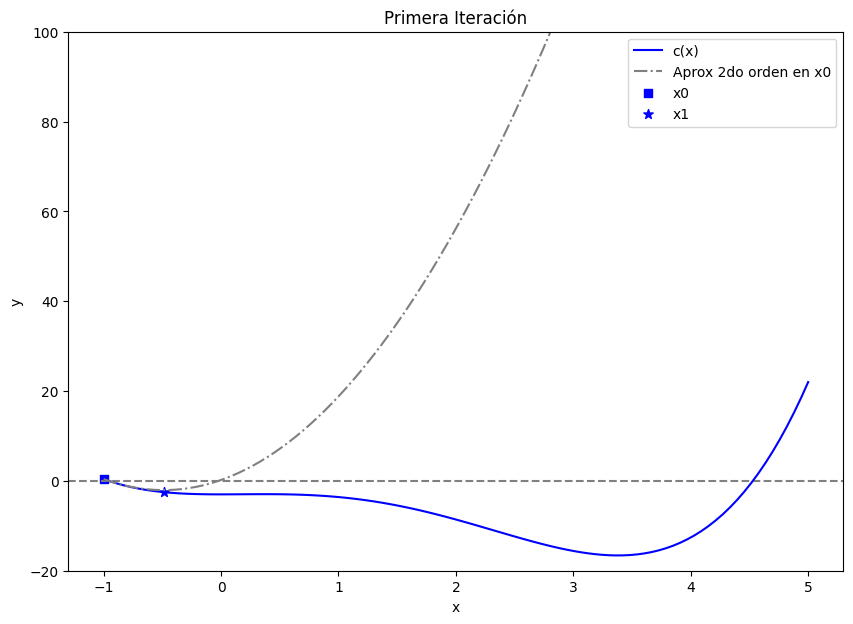

In [ ]:
x0 = -1
X = np.linspace(-1,5,100)

def graf1paso(x0, X, titulo,ylim=0):
  print("x0 =",x0, "(inicial)")

  plt.figure(figsize = (10,7))
  plt.axhline(y=0, color='gray', linestyle='--')            # linea horizontal
  plt.plot(X, funcion_p(X), label="c(x)", color="blue")     # graficamos la función

  plt.plot(X, Taylor_segundogrado(X,x0),
         '-.',color='gray', label="Aprox 2do orden en x0")  # Aproximación
  plt.scatter(x0, funcion_p(x0),label="x0",
          marker="s", s=30,color="blue")                    # valor inicial (cuadro)

  x1 = xnp1(x_n=x0)
  print("x1 =", x1)

  plt.scatter(x1, funcion_p(x1),label="x1",
            marker="*", s=50,color="blue")                  # siguiente valor (estrella)
  if ylim!=0:
    plt.ylim(ylim)
  plt.legend(loc="best")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(titulo)

  plt.show()
  return(x1)

x1 = graf1paso(x0,X,"Primera Iteración",ylim=(-20,100))


In [ ]:
x0 = x1
X = np.linspace(-2,5,100)

x0 = -0.4893617021276596 (inicial)
x1 = -0.2008305144893775


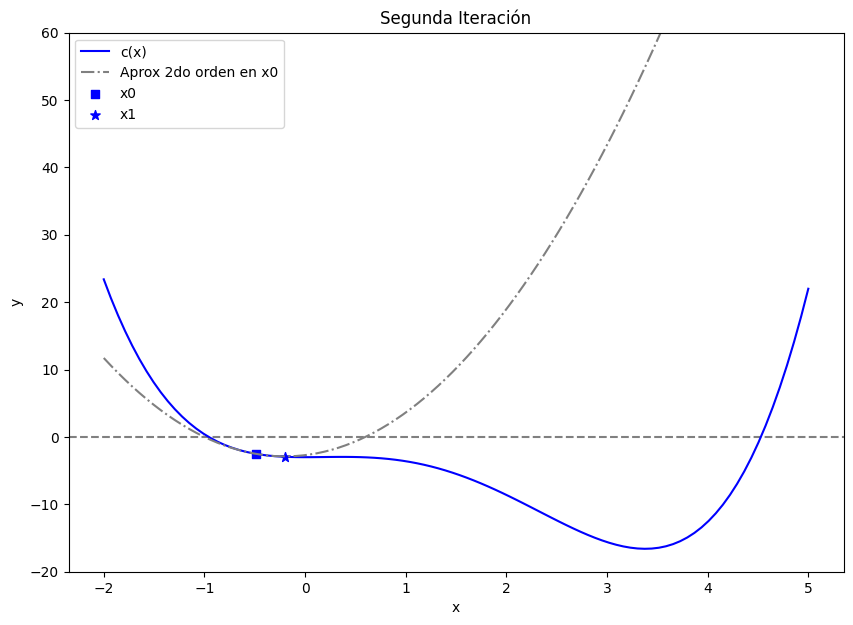

In [ ]:
x1 = graf1paso(x0,X,"Segunda Iteración",ylim=(-20,60))

In [ ]:
x0 = x1
X = np.linspace(-2,5,100)

x0 = -0.2008305144893775 (inicial)
x1 = -0.05819786860911402


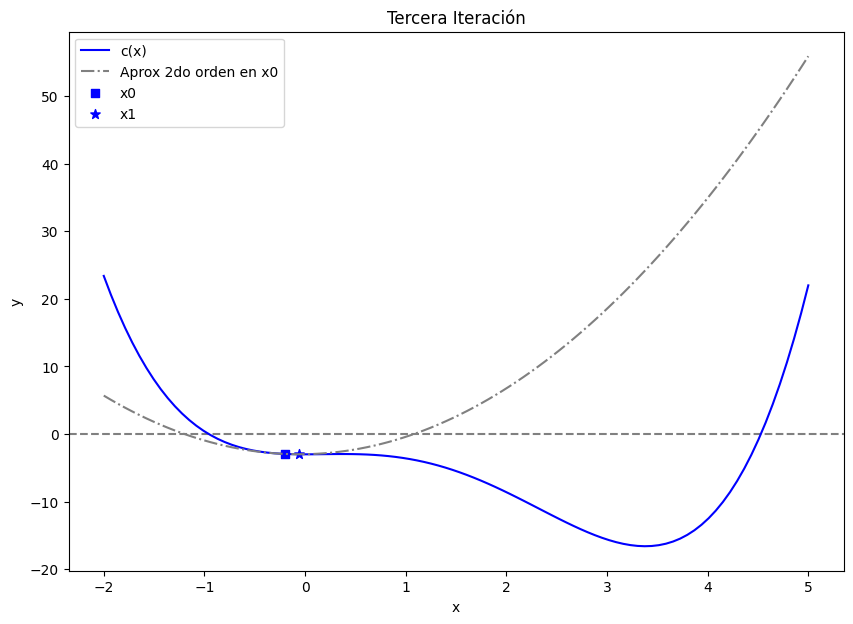

In [ ]:
x1 = graf1paso(x0,X,"Tercera Iteración")

In [ ]:
x0 = x1
X = np.linspace(-2,5,100)

x0 = -0.05819786860911402 (inicial)
x1 = -0.007718439131445917


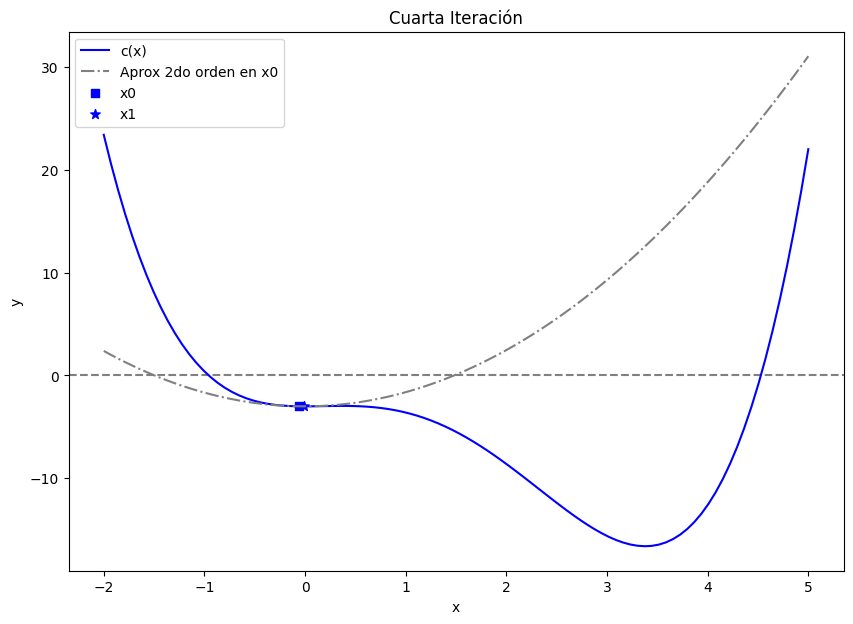

In [ ]:
x1 = graf1paso(x0,X,"Cuarta Iteración")

#### x0 = 1.5

In [ ]:
x0 = 1.5
X = np.linspace(-2,5,100)

x0 = 1.5 (inicial)
x1 = 0.5192307692307695


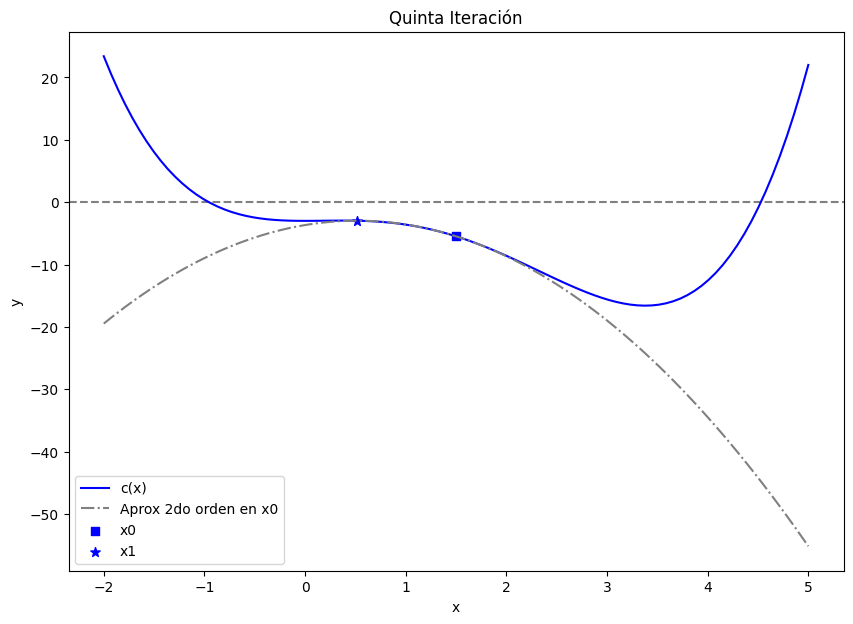

In [ ]:
x1 = graf1paso(x0,X,"Primera Iteración")

#### x0 = 5.0

x0 = 5.0 (inicial)
x1 = 4.032258064516129


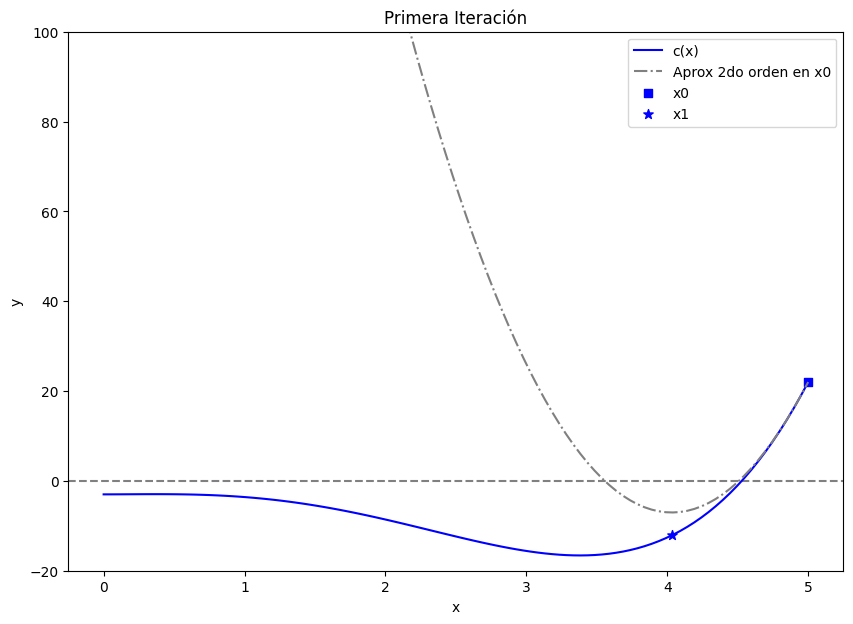

In [ ]:
x0 = 5.0
X = np.linspace(0,5,100)
x1 = graf1paso(x0,X,"Primera Iteración",ylim=(-20,100))

x0 = 4.032258064516129 (inicial)
x1 = 3.5455559537770838


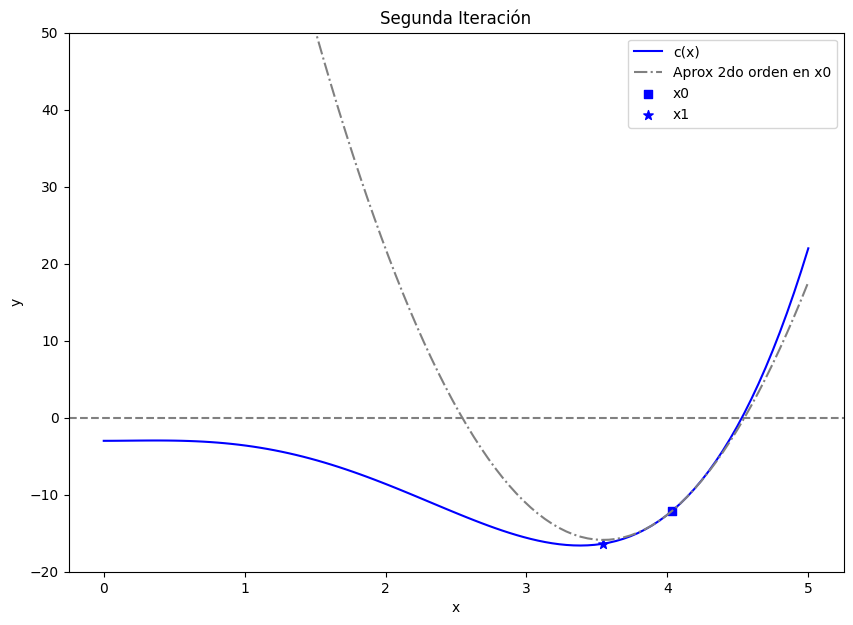

In [ ]:
x0 = x1
X = np.linspace(0,5,100)
x1 = graf1paso(x0,X,"Segunda Iteración",ylim=(-20,50))

x0 = 3.5455559537770838 (inicial)
x1 = 3.395054720907185


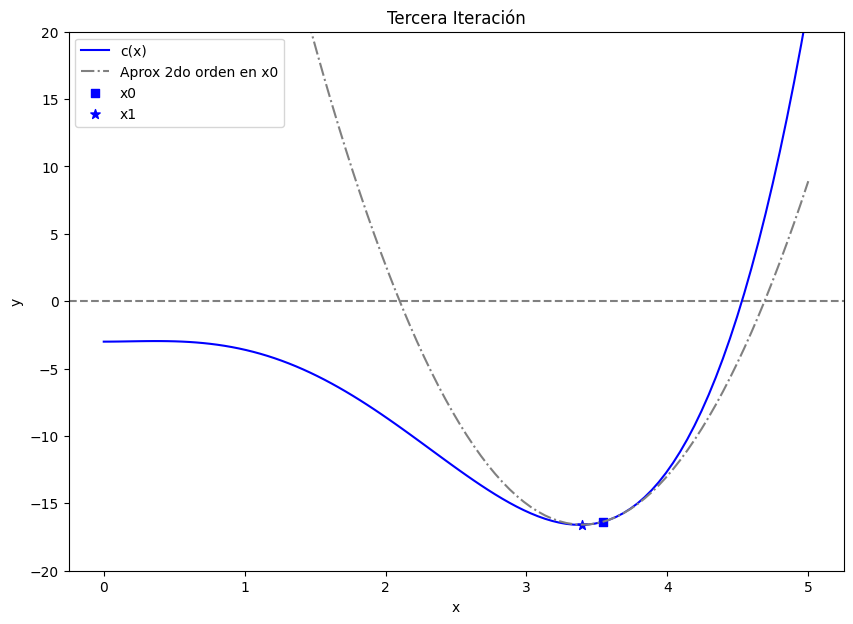

In [ ]:
x0 = x1
X = np.linspace(0,5,100)
x1 = graf1paso(x0,X,"Tercera Iteración",ylim=(-20,20))

## Descenso de gradiente multivariado

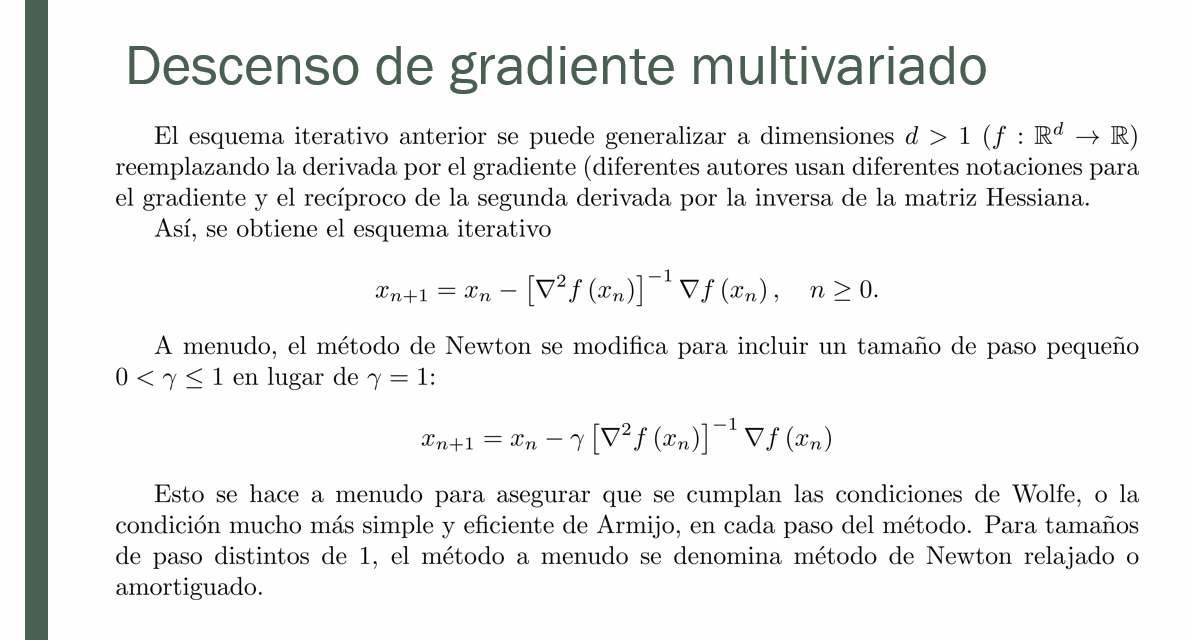

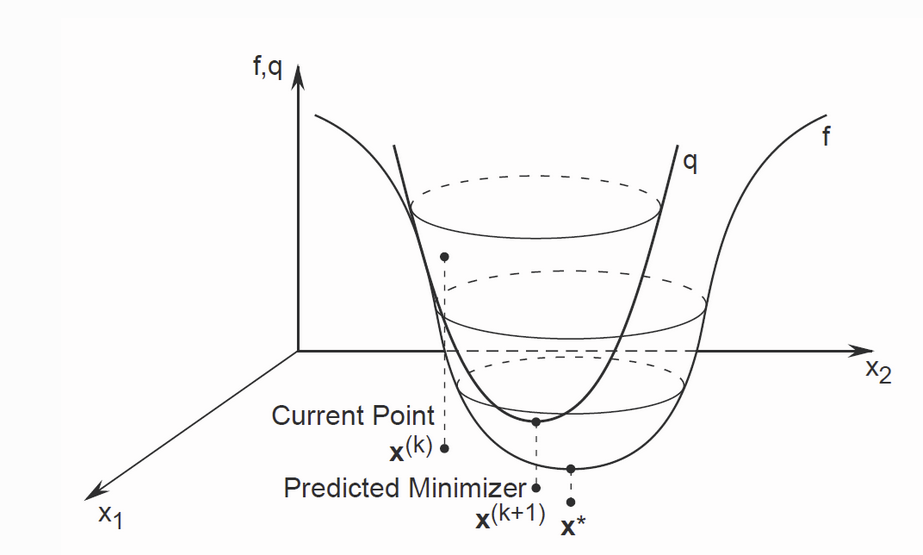

#### Ejemplo 1

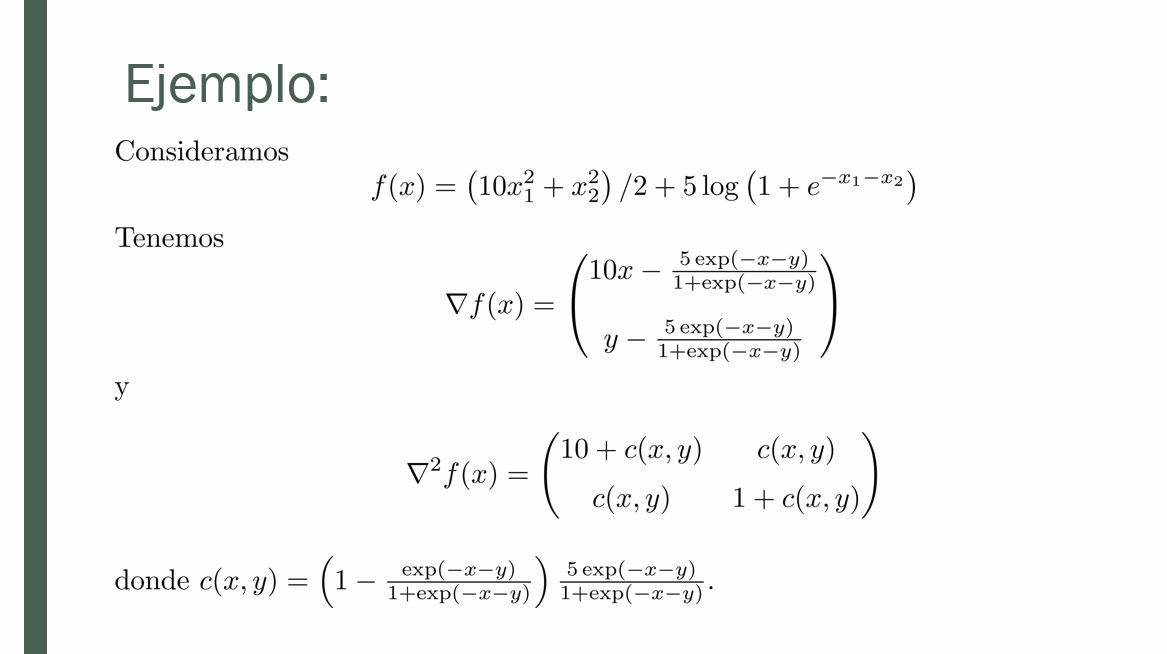

In [193]:
def cost_fun(x,y):
  return (10*x**2+y**2)/2+5*np.log(1+np.exp(-x-y))

In [194]:
res=50
# Generate x and y values
x = np.linspace(-20, 20, res)
y = np.linspace(-20, 20, res)
x, y = np.meshgrid(x, y)

z = cost_fun(x, y)

Text(0.5, 1.0, 'Curvas de nivel de of f(x, y)')

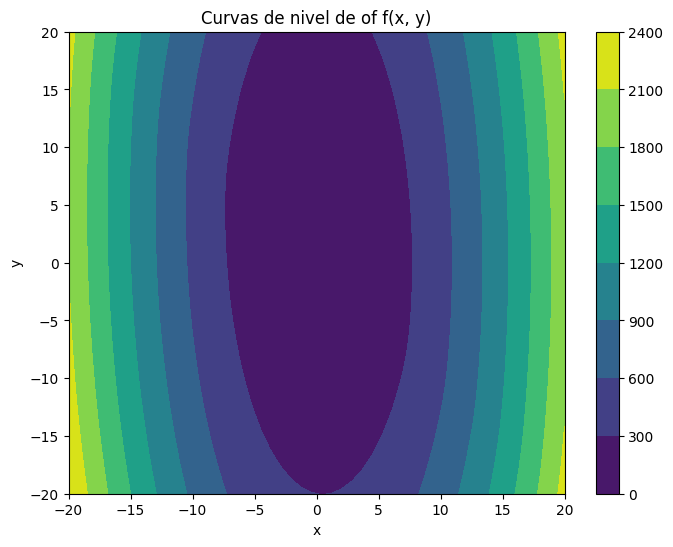

In [159]:
plt.figure(figsize=(8, 6))

contour = plt.contourf(x, y, z)

plt.colorbar(contour)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel de of f(x, y)')

In [292]:
def gradiente(x):
  c=5*np.exp(-x[0]-x[1])/(1+np.exp(-x[0]-x[1]))
  return np.array([10*x[0],x[1]])-c

def hessiano(x):
  #c= -5.0*np.exp(-x[0]-x[1])**2/((1+np.exp(-x[0]-x[1]))**2) + 5*np.exp(-x[0]-x[1])/(1+np.exp(-x[0]-x[1]))
  #c= (1-np.exp(-x[0]-x[1])/(1+np.exp(-x[0]-x[1])))*5*np.exp(-x[0]-x[1])/(1+np.exp(-x[0]-x[1]))
  c=(1-1/(np.exp(x[0]+x[1]) + 1))*5/(np.exp(x[0]+x[1])+1)
  return np.array([[10.0,0.0],[0.0,1.0]])+c

In [293]:
-gradiente((20.0, 20.0))

array([-200.,  -20.])

In [294]:
hessiano((20.0, 20.0))

array([[1.00000000e+01, 2.12417713e-17],
       [2.12417713e-17, 1.00000000e+00]])

In [295]:
-np.linalg.inv(hessiano((20.0, 20.0))).dot(gradiente((20.0, 20.0)))

array([-20., -20.])

In [298]:
def newton_raphson(x0, max_iterations, tolerance):
    x = x0.copy()
    x_v = x0.copy()

    for iteration in range(max_iterations):
        print(f"Iteración {iteration+1}")
        grad = gradiente(x)
        hess = hessiano(x)
        if np.linalg.det(hess) == 0:
            print("Matriz Hessiana is singular. No se puede continuar.")
            break
        delta_x = -np.linalg.inv(hess).dot(grad) # signo negativo porque queremos minimizar
        x = x + delta_x
        x_v=np.vstack((x_v,x))

        if np.linalg.norm(delta_x) < tolerance:
            print(f"La solución converge despues de  {iteration} iteraciones.")
            break

    return x_v

In [299]:
evolucion = newton_raphson(x0=np.array([20.0, 20.0]), max_iterations=10, tolerance=1e-6)

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
La solución converge despues de  4 iteraciones.


In [300]:
evolucion

array([[20.        , 20.        ],
       [ 0.        ,  0.        ],
       [ 0.10526316,  1.05263158],
       [ 0.11239238,  1.12392383],
       [ 0.11246718,  1.12467177],
       [ 0.11246719,  1.12467185]])

Text(0.5, 1.0, 'Curvas de nivel de of f(x, y)')

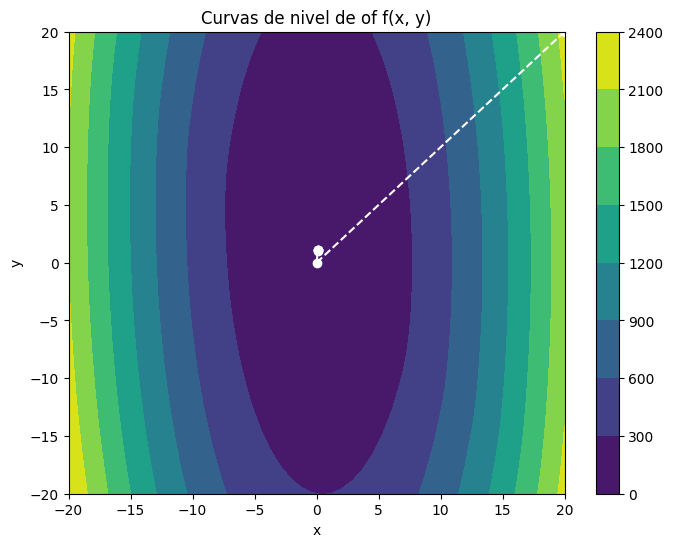

In [302]:
plt.figure(figsize=(8, 6))

contour = plt.contourf(x, y, z)

plt.colorbar(contour)
plt.plot(evolucion[:,0],evolucion[:,1], marker='o', linestyle='--', color='w')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel de of f(x, y)')

#### Ejemplo 2

La función a minimizar es
$$
f(x,y)=x^2+y^2-4x-4y.
$$

In [ ]:

def cost_function(x):
    #  cost function
    return x[0]**2 +  x[1]**2 - 4*x[0] - 4*x[1]


def gradient(x):
    # Calculate the gradient of the cost function.
    # For example: return np.array([2 * x[0], 2 * x[1]])
    return np.array([2 * x[0]-4, 2*x[1]-4])   # Partial derivative of f with respect to x
def hessian(x):
    # Calculate the Hessian matrix of the cost function.

    return np.array([[2,0], [0, 2]])

def newton_raphson(initial_guess, max_iterations, tolerance):
    x = initial_guess

    for iteration in range(max_iterations):
        grad = gradient(x)
        hess = hessian(x)
        if np.linalg.det(hess) == 0:
            print("Hessian matrix is singular. Unable to continue.")
            break
        delta_x = -np.linalg.inv(hess).dot(grad)
        x = x + delta_x

        if np.linalg.norm(delta_x) < tolerance:
            print(f"Converged to solution after {iteration} iterations.")
            break

    return x

# Set initial guess, maximum iterations, and tolerance
initial_guess = np.array([1.0, -20.0])
max_iterations = 100
tolerance = 1e-6

# Call the Newton-Raphson method
result = newton_raphson(initial_guess, max_iterations, tolerance)
print("Optimal solution:", result)
print("Minimum cost:", cost_function(result))

Converged to solution after 1 iterations.
Optimal solution: [2. 2.]
Minimum cost: -8.0


# Algoritmo EM

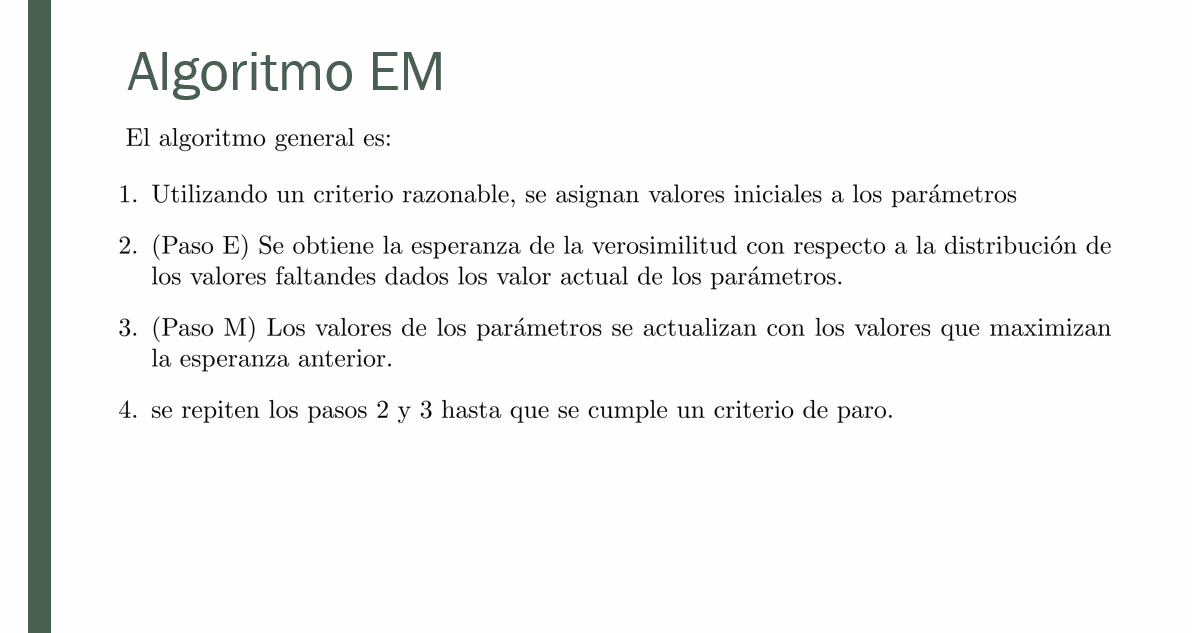

In [303]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#### Ejemplo simple de datos incompletos

Generamos "datos" que provienen de una distribución Gaussiana

In [338]:
num_obs=300         # número de observaiones
np.random.seed(101) # para reproducibilidad
media = 3
varianza = 2

# Scale and translate the random numbers to match the desired mean and variance.
datos = np.random.randn(num_obs) * np.sqrt(varianza) + media


A continuación graficamos el histograma de frecuencias relativas para conocer las principales características de los datos

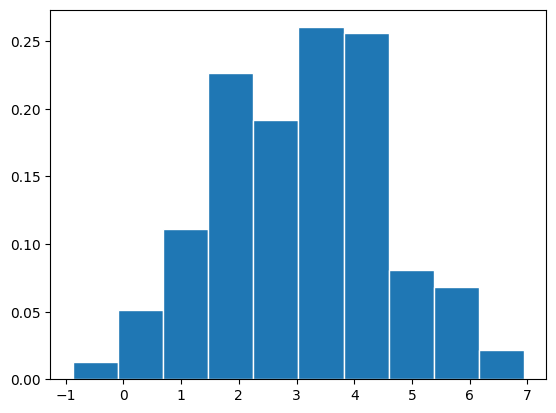

In [339]:
h = plt.hist(datos, bins=10, density=True, edgecolor='white')

In [340]:
df = pd.DataFrame(datos, columns=['Valores'])
print(df.describe())

          Valores
count  300.000000
mean     3.071845
std      1.478255
min     -0.870695
25%      1.930555
50%      3.208252
75%      4.051640
max      6.938598


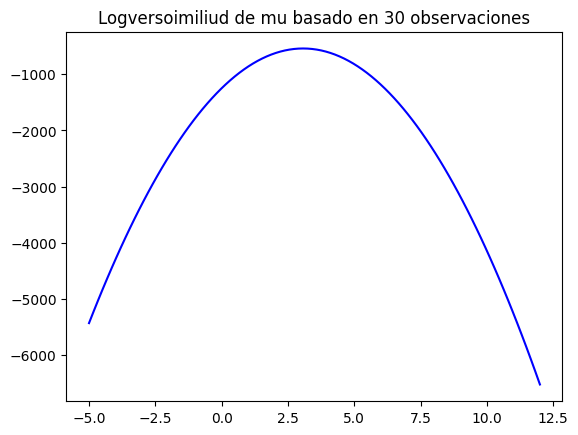

In [341]:
def LogVerN_mu(mu):
 vec = 1/np.sqrt(2*np.pi*varianza)*np.exp(-(datos-mu)**2/(2*varianza))
 return np.sum(np.log(vec))



X = np.linspace(-5,12,100)
lv =[]
for x in X:
  lv.append(LogVerN_mu(x))

plt.plot(X,lv,label="log Ver",color="blue")  # La logverosimilitud de mu
plt.title('Logversoimiliud de mu basado en 30 observaciones')
plt.show()

Ahora suponemos que hay un dato extra que no observamos y queremos estimar el estimador máximo verosímil de $\mu$ basados en todos los datos observados, así como el que no observamos ($x$).

In [325]:
def LogVerN(mu,x):
 todos_datos=np.append(datos,x)
 vec = 1/np.sqrt(2*np.pi*varianza)*np.exp(-(todos_datos-mu)**2/(2*varianza))
 return np.sum(np.log(vec))


In [ ]:
LogVerN(3,3)

-16.7658550696761

Graficamos la verosimilitud de $\mu$ y $x$.

In [346]:
res=30  # que tan fina es la malla
# Generamos los valores de x y y
mu = np.linspace(-20, 30, res)
x = np.linspace(-20, 30, res)
mu, x = np.meshgrid(mu, x)

# Calculamos los valores z
z =  np.zeros((res, res))
for i in range(res):
  for j in range(res):
    z[i,j] = LogVerN(mu[i,j], x[i,j])

Creamos la gráfica de la función

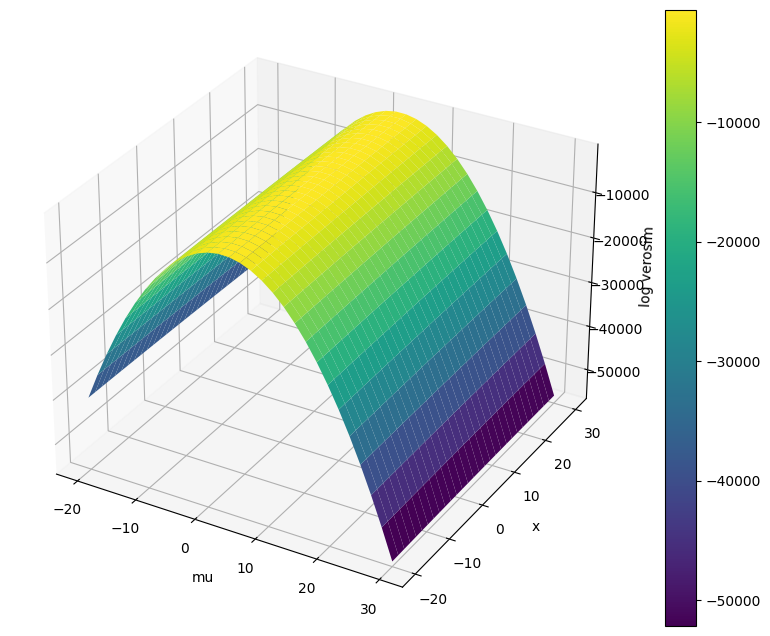

In [347]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(mu, x, z, cmap='viridis')

# Add color bar
fig.colorbar(surface)

# Add labels and title
ax.set_xlabel('mu')
ax.set_ylabel('x')
ax.set_zlabel('log verosim')
#ax.set_title('Surface plot of f(x, y)')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Contour plot of f(x, y)')

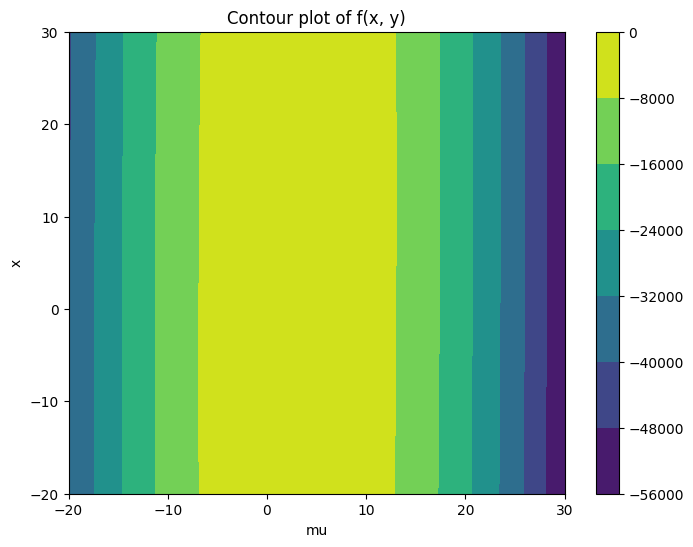

In [348]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(mu, x, z, cmap='viridis')
plt.colorbar(contour)  #colorbar

plt.xlabel('mu')
plt.ylabel('x')
plt.title('Contour plot of f(x, y)')

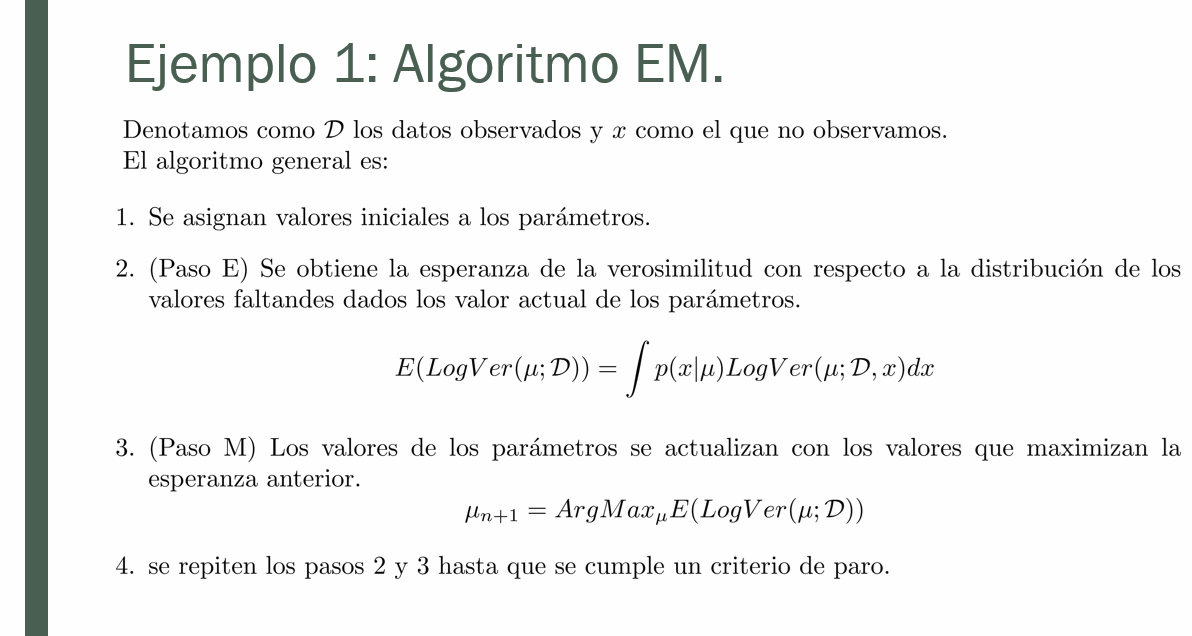

In [349]:
n_pasos = 10
mu_v =  np.zeros((n_pasos))
x_v =  np.zeros((n_pasos))
mu0 = 30                   #el valor inicial
for i in range(n_pasos):
  if i == 0:
    mu_v[0] = mu0
  else:
    mu_v[i] = (2*np.sum(datos)+mu0)/(2*datos.size+1)
    mu0 = mu_v[i]

In [350]:
mu_v

array([30.        ,  3.11665107,  3.07192004,  3.07184561,  3.07184549,
        3.07184549,  3.07184549,  3.07184549,  3.07184549,  3.07184549])

Text(0.5, 1.0, 'Contour plot of f(x, y)')

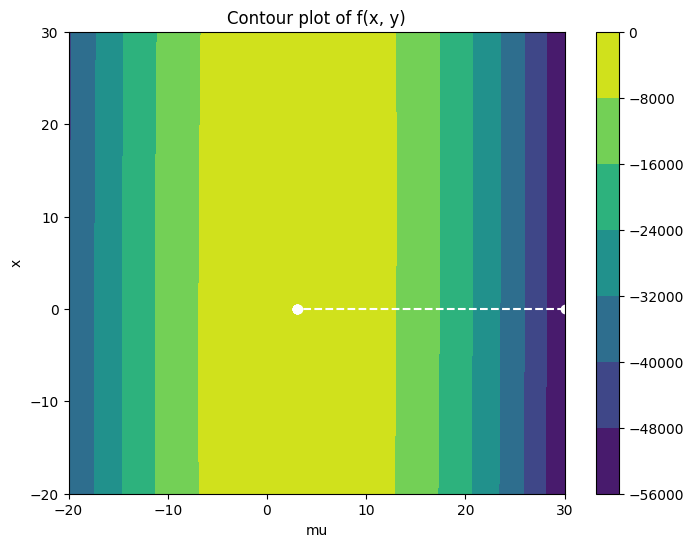

In [351]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(mu, x, z, cmap='viridis')
# Add the colorbar
plt.colorbar(contour)

plt.plot(mu_v, np.zeros((mu_v.size)), marker='o', linestyle='--', color='w', label='Data points')

plt.xlabel('mu')
plt.ylabel('x')
plt.title('Contour plot of f(x, y)')

#### Ejemplo de mezcla de distribuciones

La función de densidad de probabilida de una mezcla es :
$$
f(x \mid \theta)=w f_1\left(x \mid \mu_1, \sigma_1^2\right)+(1-w) f_2\left(x \mid \mu_2, \sigma_2^2\right)
$$

El objetivo es encontrar el mejor ajuste encontrando
 $\theta=\left(w, \mu_1, \sigma_1^2, \mu_2, \sigma_2^2\right)$ a través de iteraciones EM.

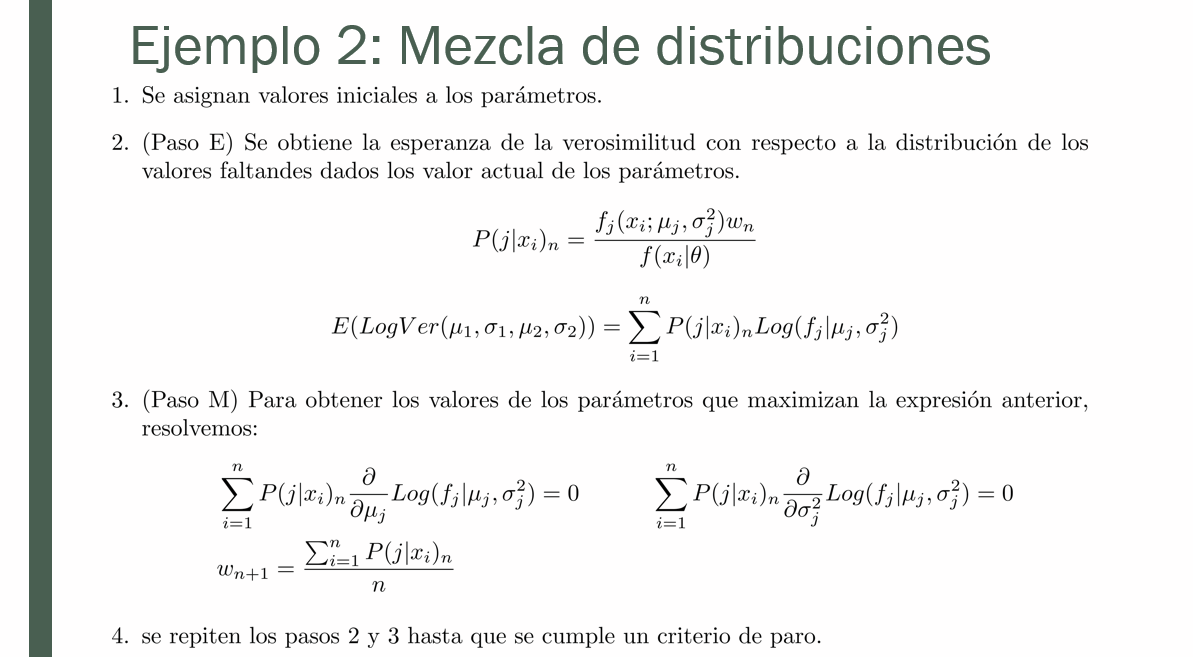

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
import numpy as np
#for normalization + probability density function computation
from scipy import stats
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
print("import done")

import done


Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0


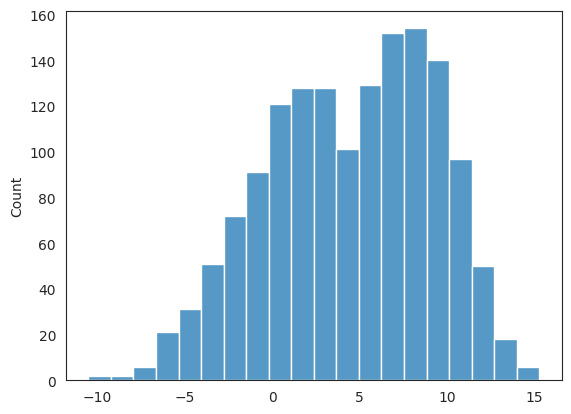

In [356]:
random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)

# For data visiualisation calculate left and right of the graph
Min_graph = min(data)
Max_graph = max(data)
x = np.linspace(Min_graph, Max_graph, 2000) # to plot the data

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
sns.histplot(data, bins=20, kde=False);



In [357]:
class Gaussian:                   # Modelo Gausiano univariado
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #función de densidad de probabilidad evaluado en datum
    def pdf(self, datum):
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)
print("done")

done


Gausiana unica de mejor ajuste: μ = 4.4, σ = 4.8


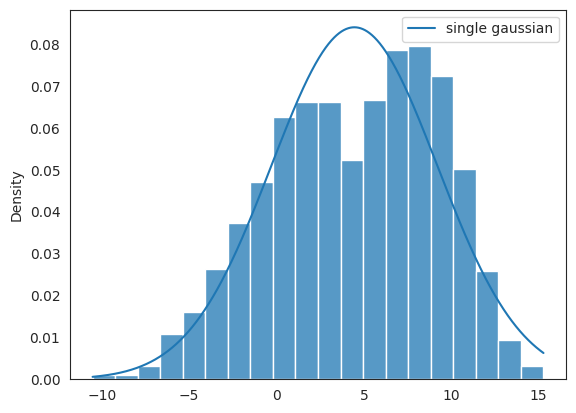

In [358]:
#gaussian of best fit
best_single = Gaussian(np.mean(data), np.std(data))
print('Gausiana unica de mejor ajuste: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))
#fit a single gaussian curve to the data
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.histplot(data, bins=20, kde=False, stat="density");
plt.plot(x, g_single, label='single gaussian');
plt.legend();

In [359]:
class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min = min(data), mu_max = max(data), sigma_min = 1, sigma_max = 1, mix=.5):
        self.data = data
        #todo the Algorithm would be numerical enhanced by normalizing the data first, next do all the
        #EM steps and do the de-normalising at the end

        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max),
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max),
                            uniform(sigma_min, sigma_max))

        #as well as how much to mix them
        self.mix = mix

    def Estep(self):
        "E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:
            # pesos sin normalizar:
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalizamos
            wp1 /= den
            wp2 /= den     # Ahora wp1+wp2= 1, ya que el dato pertenece a la primera o la segudna distribución
            self.loglike += log(den) #se añade a la logverosimilitud
            yield (wp1, wp2)  # yield weight tuple

    def Mstep(self, weights):
        "M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights)
        one_den = sum(left)
        two_den = sum(rigt)

        # compute new means
        self.one.mu = sum(w * d  for (w, d) in zip(left, data)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data)) / two_den

        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)


    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep()) #The heart of the algorith, perform E-stepand next M-step
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)

    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one,
                                                              self.two,
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one,
                                                        self.two,
                                                        self.mix)
print("done")

done


Ver algunas ejecuciones del algoritmo

In [360]:
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture_self(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix

    except (ZeroDivisionError, ValueError, RuntimeWarning): # Cachar errores de divisiones
        print("one less")
        pass

 1 Mixture: Gaussian(0.681358, 3.01079), Gaussian(8.63325, 2.07233), mix=0.526)
 1 Mixture: Gaussian(0.868188, 3.2368), Gaussian(8.53297, 2.2491), mix=0.533)
 1 Mixture: Gaussian(0.962746, 3.3459), Gaussian(8.48339, 2.32187), mix=0.536)
 1 Mixture: Gaussian(1.02286, 3.40894), Gaussian(8.45979, 2.35763), mix=0.539)
 1 Mixture: Gaussian(1.06576, 3.44926), Gaussian(8.45024, 2.37571), mix=0.542)
 1 Mixture: Gaussian(1.09893, 3.477), Gaussian(8.44872, 2.38422), mix=0.544)
 1 Mixture: Gaussian(1.12616, 3.49732), Gaussian(8.45195, 2.38723), mix=0.546)
 1 Mixture: Gaussian(1.14958, 3.51306), Gaussian(8.45798, 2.38698), mix=0.548)
 1 Mixture: Gaussian(1.17047, 3.52588), Gaussian(8.46566, 2.38478), mix=0.55)
 1 Mixture: Gaussian(1.18959, 3.53679), Gaussian(8.47426, 2.38141), mix=0.552)
 1 Mixture: Gaussian(1.20742, 3.54642), Gaussian(8.48334, 2.37738), mix=0.554)
 1 Mixture: Gaussian(1.22427, 3.55516), Gaussian(8.4926, 2.37298), mix=0.556)
 1 Mixture: Gaussian(1.24034, 3.56326), Gaussian(8.50188

Ahora sí, corremos el EM para encontrar la mejor mezcla de distribuciones gausianas

Computing best model with random restarts...

Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0
Gaussian 1: μ = 1.8, σ = 3.8, weight = 0.62
Gaussian 2: μ = 8.8, σ = 2.2, weight = 0.38


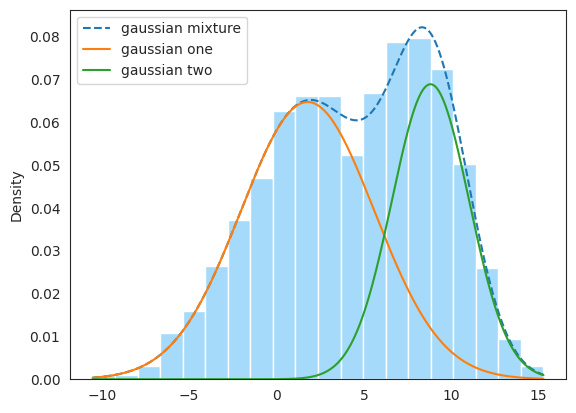

In [ ]:
n_iterations = 300
n_random_restarts = 4
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture_self(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
#print('Best Gaussian Mixture : μ = {:.2}, σ = {:.2} with μ = {:.2}, σ = {:.2}'.format(best_mix.one.mu, best_mix.one.sigma, best_mix.two.mu, best_mix.two.sigma))

print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("1", best_mix.one.mu, best_mix.one.sigma, best_mix.mix))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("2", best_mix.two.mu, best_mix.two.sigma, (1-best_mix.mix)))
#Show mixture
sns.histplot(data, bins=20, kde=False,  stat="density",color="lightskyblue");
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, '--', label='gaussian mixture');
g_left = [best_mix.one.pdf(e) * best_mix.mix for e in x]
plt.plot(x, g_left, label='gaussian one');
g_right = [best_mix.two.pdf(e) * (1-best_mix.mix) for e in x]
plt.plot(x, g_right, label='gaussian two');
plt.legend();